In [6]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=8,4
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Check working directory
import os
print(os.getcwd())

C:\Users\WendyW\Desktop\Data Science\Statistics\Projects\001 Iris data


In [7]:
#Import data
iris = pd.read_csv('Iris.csv')

In [8]:
#Number of rows
print(len(iris))

150


In [9]:
#Number of columns
print(len(iris.columns))

6


In [10]:
#Names of columns
iris.columns

Index(['Species_No', 'Petal_width', 'Petal_length', 'Sepal_width',
       'Sepal_length', 'Species_name'],
      dtype='object')

In [11]:
#Top 5 rows
iris.head()

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
0,1,0.2,1.4,3.5,5.1,Setosa
1,1,0.2,1.4,3.0,4.9,Setosa
2,1,0.2,1.3,3.2,4.7,Setosa
3,1,0.2,1.5,3.1,4.6,Setosa
4,1,0.2,1.4,3.6,5.0,Setosa


In [12]:
#Bottom 6 rows
iris.tail(6)

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
144,3,2.5,5.7,3.3,6.7,Verginica
145,3,2.3,5.2,3.0,6.7,Verginica
146,3,1.9,5.0,2.5,6.3,Verginica
147,3,2.0,5.2,3.0,6.5,Verginica
148,3,2.3,5.4,3.4,6.2,Verginica
149,3,1.8,5.1,3.0,5.9,Verginica


In [29]:
#Check number of blank values per column
iris.isnull().sum()

Species_No      0
Petal_width     0
Petal_length    0
Sepal_width     0
Sepal_length    0
Species_name    0
dtype: int64

In [13]:
#Data type per column
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Species_No      150 non-null int64
Petal_width     150 non-null float64
Petal_length    150 non-null float64
Sepal_width     150 non-null float64
Sepal_length    150 non-null float64
Species_name    150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [14]:
#Description of float64 columns. Check for zeroes
iris.describe()

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,1.199333,3.758000,3.057333,5.843333
std,0.819232,0.762238,1.765298,0.435866,0.828066
min,1.000000,0.100000,1.000000,2.000000,4.300000
25%,1.000000,0.300000,1.600000,2.800000,5.100000
50%,2.000000,1.300000,4.350000,3.000000,5.800000
75%,3.000000,1.800000,5.100000,3.300000,6.400000
max,3.000000,2.500000,6.900000,4.400000,7.900000


In [16]:
#Groups in text columns
iris.Species_name.unique()

array([' Setosa', ' Versicolor', ' Verginica'], dtype=object)

In [17]:
#Count per group 
iris.Species_name.value_counts()

 Versicolor    50
 Verginica     50
 Setosa        50
Name: Species_name, dtype: int64

In [19]:
iris1 = iris.drop('Species_No',1)

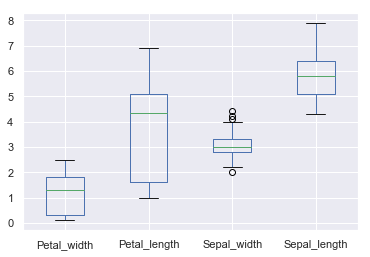

In [20]:
#Boxplot of each column to check for outliers
iris1.plot(kind='box', sharex = False, sharey = False )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D214208>,
      dtype=object)

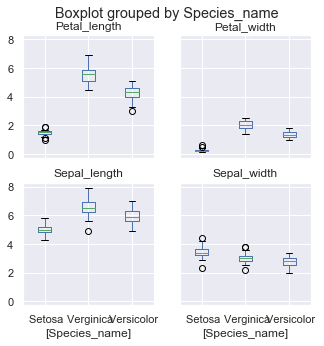

In [23]:
#Boxplot of each column, split by groups, to check for outliers
iris1.boxplot(by='Species_name', figsize=(5,5))

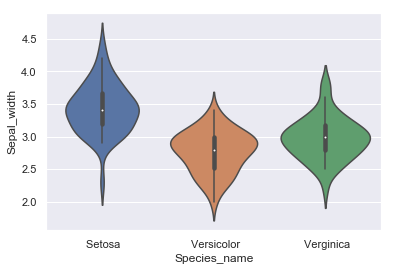

In [27]:
#Summary of each independent variable ('y') per group
violin = sns.violinplot(data=iris1, x='Species_name', y='Sepal_width')
violin

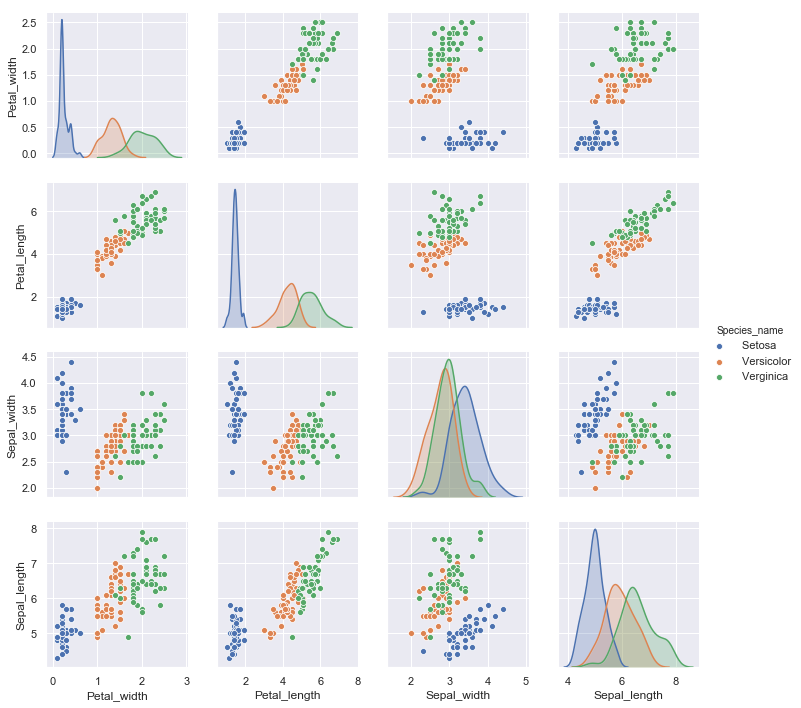

In [28]:
#Relationship between each independent variable, per group
sns.pairplot(iris1, hue='Species_name')

#kde = probability density at different values

In [30]:
#What model best fits and describes the data? Model fits all of the data per species. Setosa is grouped separately in all 
#of the plots. 

#Import libraries for metric evaluation
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [37]:
#Split dataset into training and test/validation 
x = iris1.iloc[:, :-1].values #columns start to second last
y = iris1.iloc[:, -1].values #last column

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state =7)
#80% used to train the model and 20% held back for validation testing

#Test options and evaluation metric
seed=7
scoring='accuracy'

In [38]:
#Models to check:
#Logistic Regression (LR)
#Linear Discriminant Analysis (LDA)
#K-Nearest Neighbors (KNN).
#Classification and Regression Trees (CART).
#Gaussian Naive Bayes (NB).
#Support Vector Machines (SVM).

#Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#Evaluate each model in turn. Produces accuracy scores, % correct
results = []
names = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=seed)
 cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


In [40]:
#KNN produced one of the highest accuracy scores

# Make predictions on validation dataset 
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9
[[ 7  0  0]
 [ 0  9  2]
 [ 0  1 11]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         7
   Verginica       0.90      0.82      0.86        11
  Versicolor       0.85      0.92      0.88        12

   micro avg       0.90      0.90      0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
#The accuracy is 0.9 or 90%. 
#The confusion matrix provides an indication of the three errors made. 
#Finally, the classification report provides a breakdown of each class by precision, 
#recall, f1-score and support showing excellent results (granted the validation dataset was small).